In [17]:
import pandas as pd

df = pd.read_csv('fake_job_postings.csv')
print(df.shape)
df.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df_info = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(t) for t in df.dtypes],
    "non_null_count": df.notnull().sum().values,
    "n_unique": df.nunique().values,
    "n_missing": df.isna().sum().values
})
df_info

,column,dtype,non_null_count,n_unique,n_missing
0,job_id,int64,17880,17880,0
1,title,object,17880,11231,0
2,location,object,17534,3105,346
3,department,object,6333,1337,11547
4,salary_range,object,2868,874,15012
5,company_profile,object,14572,1709,3308
6,description,object,17879,14801,1
7,requirements,object,15184,11967,2696
8,benefits,object,10668,6204,7212
9,telecommuting,int64,17880,2,0


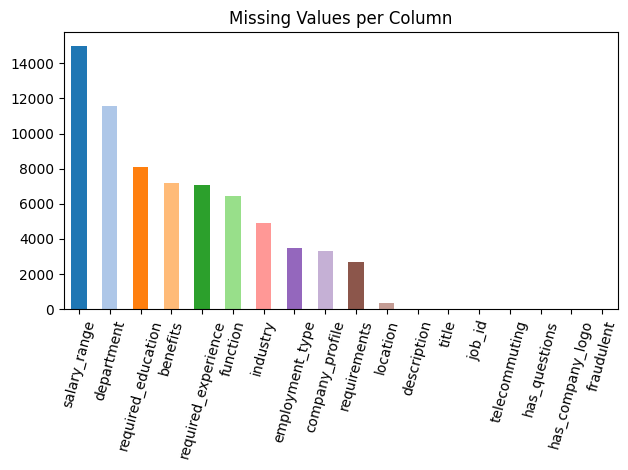

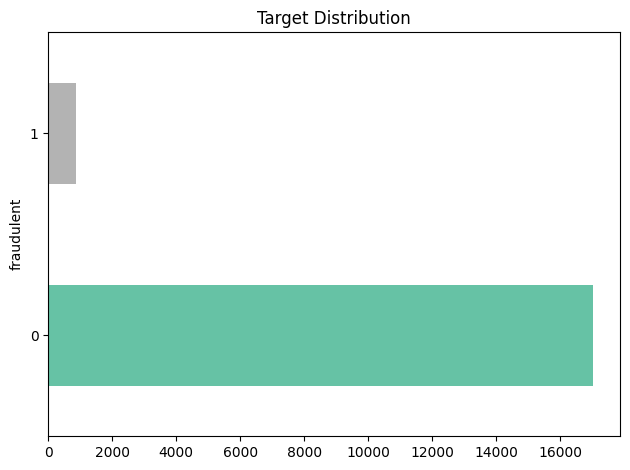

In [4]:

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
plt.figure(); 
df.isna().sum().sort_values(ascending=False).plot(kind='bar', rot=75,color=cm.tab20(np.linspace(0, 1, df.shape[1]))); plt.title("Missing Values per Column"); 
plt.tight_layout(); plt.show()
plt.figure(); df['fraudulent'].value_counts().sort_index().plot(kind='barh',rot=0,color=cm.Set2(np.linspace(0, 1, df['fraudulent'].nunique()))
); plt.title("Target Distribution"); plt.tight_layout(); plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])
print("Min-Max Scaled Data:")
df_minmax_scaled.head()

Min-Max Scaled Data:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0.000000,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0.0,1.0,0.0,Other,Internship,NaN,NaN,Marketing,0.0
1,0.000056,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0.0,1.0,0.0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,0.000112,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,0.000168,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0.0,1.0,0.0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,0.000224,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0.0,1.0,1.0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [22]:
from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()
df_zscore_scaled = df.copy()
df_zscore_scaled[numeric_cols] = zscore_scaler.fit_transform(df[numeric_cols])
print("Z-score Standardized Data:")
df_zscore_scaled.head()

Z-score Standardized Data:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,-1.731954,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,-0.211707,0.50733,-0.983580,Other,Internship,NaN,NaN,Marketing,-0.225609
1,-1.731760,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,-0.211707,0.50733,-0.983580,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,-0.225609
2,-1.731566,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,-0.211707,0.50733,-0.983580,NaN,NaN,NaN,NaN,NaN,-0.225609
3,-1.731373,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,-0.211707,0.50733,-0.983580,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,-0.225609
4,-1.731179,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,-0.211707,0.50733,1.016694,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,-0.225609


In [36]:
comparison = pd.DataFrame({
    "Original": df[numeric_cols].iloc[0],
    "Min-Max Scaled": df_minmax_scaled[numeric_cols].iloc[0],
    "Z-score Scaled": df_zscore_scaled[numeric_cols].iloc[0]
})
comparison

,Original,Min-Max Scaled,Z-score Scaled
job_id,1,0.0,-1.731954
telecommuting,0,0.0,-0.211707
has_company_logo,1,1.0,0.507330
has_questions,0,0.0,-0.983580
fraudulent,0,0.0,-0.225609



=== department ===
department
(missing)                       11547
Sales                             551
Engineering                       487
Marketing                         401
Operations                        270
                                ...  
QA & Programme Delivery             1
Private Duty                        1
RHB OUTSOURCING                     1
reception                           1
IT Administrator / Developer        1
Name: count, Length: 1338, dtype: int64

=== employment_type ===
employment_type
Full-time    11620
(missing)     3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

=== required_experience ===
required_experience
(missing)           7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

=== required_education ===
required_education
(missing

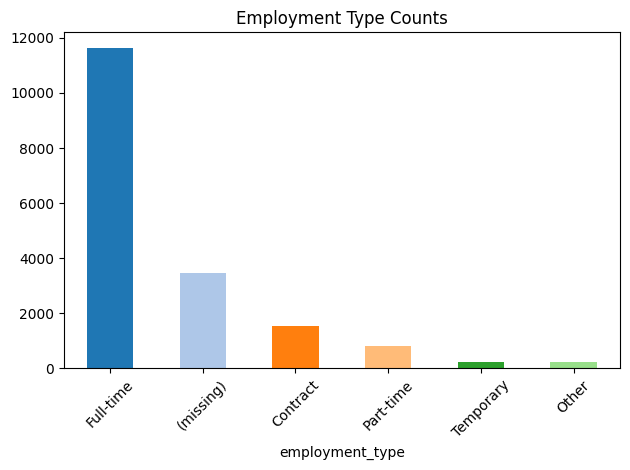

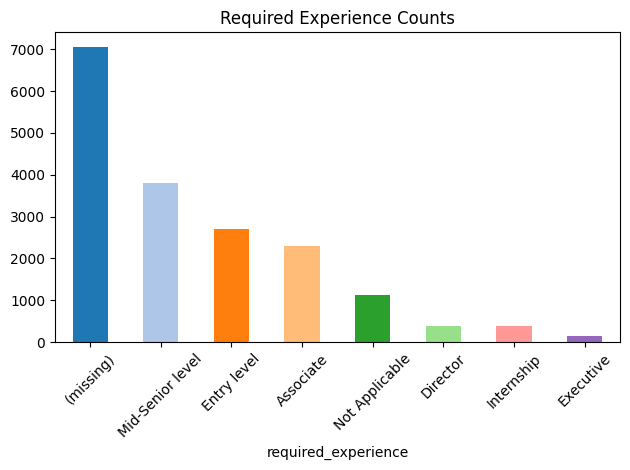

In [24]:

categorical_cols = ["department","employment_type","required_experience","required_education","industry","function","location"]
for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(df[col].fillna("(missing)").value_counts())
import matplotlib.pyplot as plt
plt.figure(); df["employment_type"].fillna("(missing)").value_counts().plot(kind='bar', rot=45,color=cm.tab20(np.linspace(0, 1, df.shape[1])));
plt.title("Employment Type Counts"); plt.tight_layout(); plt.show()
plt.figure(); df["required_experience"].fillna("(missing)").value_counts().plot(kind='bar', rot=45,color=cm.tab20(np.linspace(0, 1, df.shape[1]))); 
plt.title("Required Experience Counts"); plt.tight_layout(); plt.show()


In [25]:

import re, numpy as np, pandas as pd
def safe_len(x): return len(x) if isinstance(x, str) else 0
def word_count(x): return len(re.findall(r"\b\w+\b", x)) if isinstance(x, str) else 0
def url_count(x): return len(re.findall(r"(https?://|www\.)\S+", x)) if isinstance(x, str) else 0
def number_token_count(x): return len(re.findall(r"\b\d+\b", x)) if isinstance(x, str) else 0
def exclam_count(x): return x.count("!") if isinstance(x, str) else 0
def upper_ratio(x):
    if not isinstance(x, str) or len(x)==0: return 0.0
    letters = re.findall(r"[A-Za-z]", x)
    if not letters: return 0.0
    uppers = [ch for ch in letters if ch.isupper()]
    return len(uppers)/len(letters)

text_cols = ["title","company_profile","description","requirements","benefits"]
df["text_all"] = df[text_cols].fillna("").agg(" ".join, axis=1)
df["text_len"] = df["text_all"].apply(safe_len)
df["text_words"] = df["text_all"].apply(word_count)
df["text_urls"] = df["text_all"].apply(url_count)
df["text_numbers"] = df["text_all"].apply(number_token_count)
df["text_exclams"] = df["text_all"].apply(exclam_count)
df["text_upper_ratio"] = df["text_all"].apply(upper_ratio)
df[["job_id","text_len","text_words","text_urls","text_numbers","text_exclams","text_upper_ratio"]]


,job_id,text_len,text_words,text_urls,text_numbers,text_exclams,text_upper_ratio
0,1,2662,403,0,0,1,0.039690
1,2,6133,926,5,42,5,0.035947
2,3,2640,384,0,0,0,0.028712
3,4,5462,737,0,5,0,0.033197
4,5,3949,491,0,2,0,0.089115
...,...,...,...,...,...,...,...
17875,17876,5316,902,0,6,2,0.028346
17876,17877,4740,695,0,5,3,0.037321
17877,17878,2817,377,0,4,0,0.039012
17878,17879,1244,203,0,8,1,0.039880


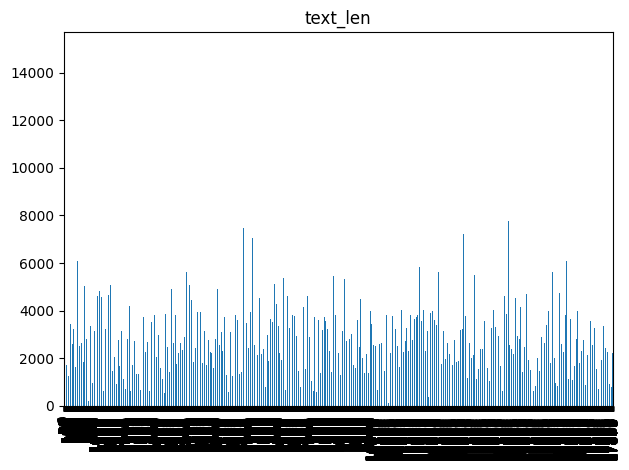

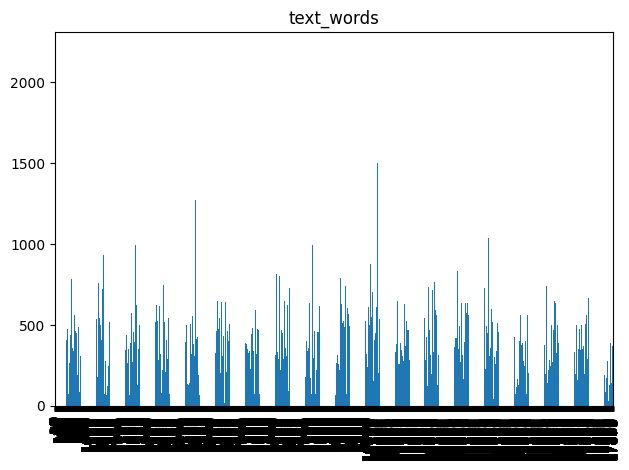

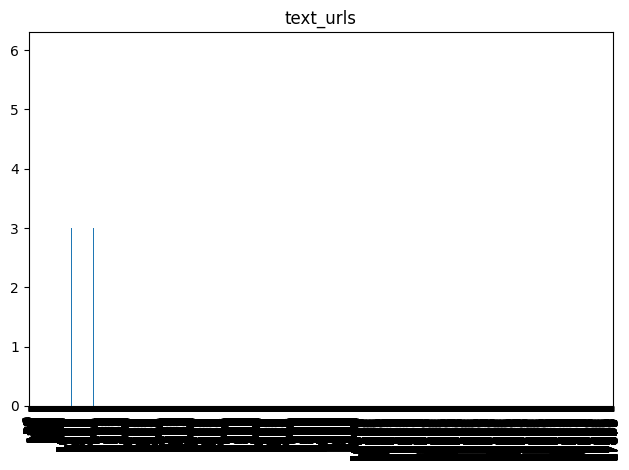

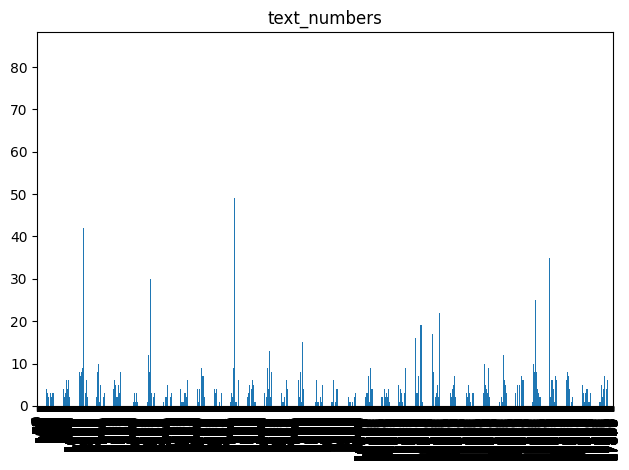

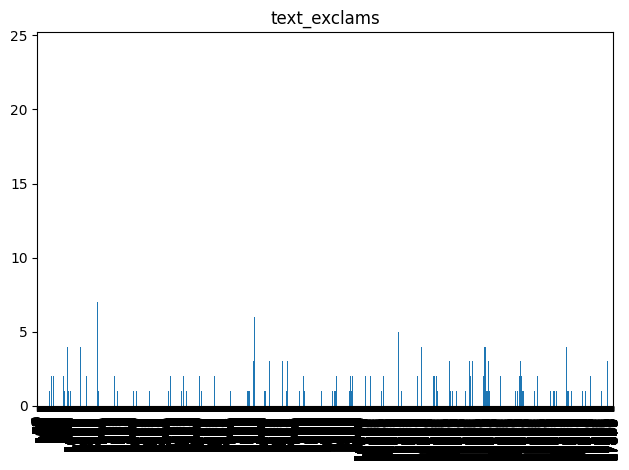

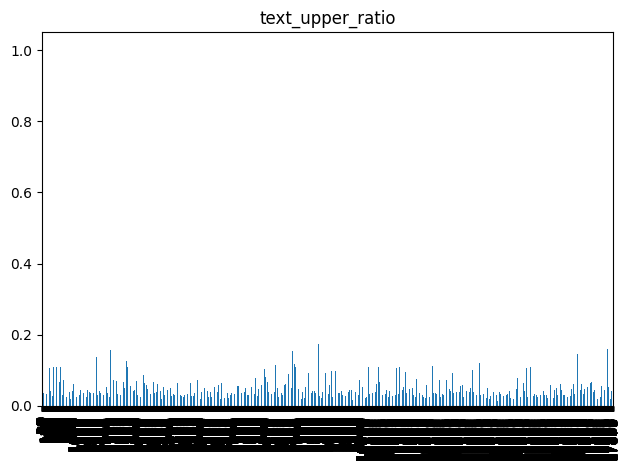

In [ ]:

#DON'T RUN ST THE TIME OF PRESENTATION
import matplotlib.pyplot as plt
for col in ["text_len","text_words","text_urls","text_numbers","text_exclams","text_upper_ratio"]:
    plt.figure(); df[col].plot(kind='bar'); plt.title(col); plt.tight_layout(); plt.show()


In [1]:

import numpy as np, pandas as pd
def split_location(loc):
    if pd.isna(loc) or not isinstance(loc, str) or loc.strip()=="" or loc.strip()==",":
        return pd.Series({"loc_country": np.nan, "loc_state": np.nan, "loc_city": np.nan})
    parts = [p.strip() for p in loc.split(",")]
    parts += [np.nan]*(3-len(parts))
    return pd.Series({"loc_country": parts[0] if parts else np.nan,
                      "loc_state": parts[1] if len(parts)>1 else np.nan,
                      "loc_city": parts[2] if len(parts)>2 else np.nan})
loc_df = df["location"].apply(split_location)
df = pd.concat([df, loc_df], axis=1)
df[["location","loc_country","loc_state","loc_city"]]


NameError: name 'df' is not defined

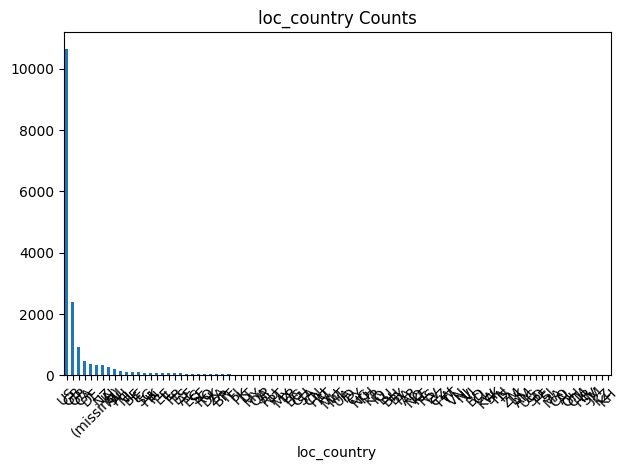

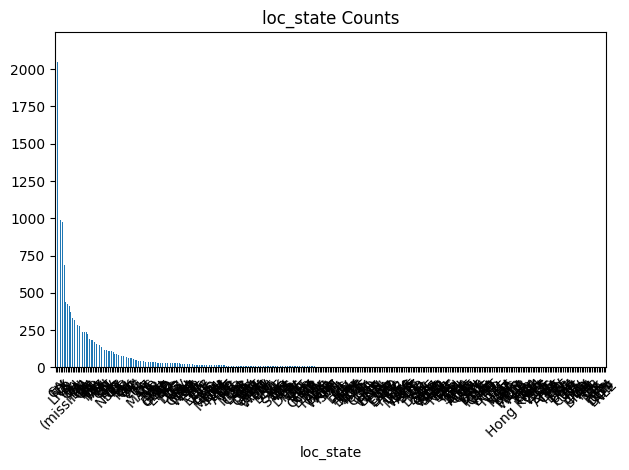

C:\Users\deepa\AppData\Local\Temp\ipykernel_10628\2415610090.py:3: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.figure(); df[col].fillna("(missing)").value_counts().plot(kind='bar', rot=45); plt.title(f"{col} Counts"); plt.tight_layout(); plt.show()
C:\Users\deepa\AppData\Local\Temp\ipykernel_10628\2415610090.py:3: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.figure(); df[col].fillna("(missing)").value_counts().plot(kind='bar', rot=45); plt.title(f"{col} Counts"); plt.tight_layout(); plt.show()
C:\Users\deepa\AppData\Local\Temp\ipykernel_10628\2415610090.py:3: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.figure(); df[col].fillna("(missing)").value_counts().plot(kind='bar', rot=45); plt.title(f"{col} Counts"); plt.tight_layout(); plt.show()
C:\Users\deepa\AppData\Local\Temp\ipykernel_10628\2415610090.py:3: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DON

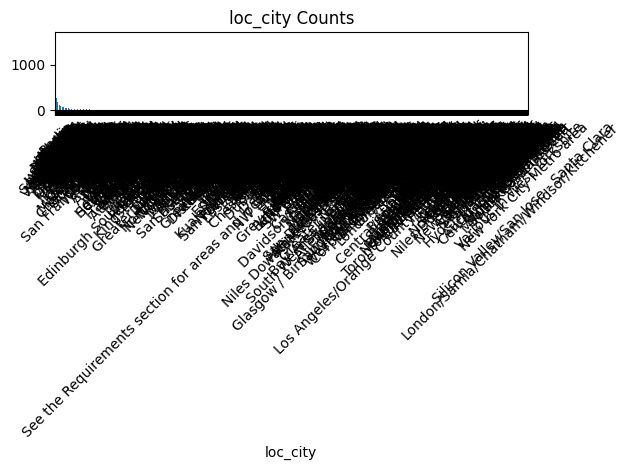

In [7]:

import matplotlib.pyplot as plt
for col in ["loc_country","loc_state","loc_city"]:
    plt.figure(); df[col].fillna("(missing)").value_counts().plot(kind='bar', rot=45); plt.title(f"{col} Counts"); plt.tight_layout(); plt.show()


In [27]:

df['text_combined'] = df[['title', 'company_profile', 'description', 'requirements', 'benefits']] \
    .fillna('').agg(' '.join, axis=1)
fake_location_counts = df[df['fraudulent'] == 1]['location'].value_counts()
risky_locations = set(fake_location_counts.head(10).index.str.lower())  

print("Top risky locations:\n", risky_locations)
def check_location_consistency(row):
    location = str(row['location']).strip().lower()
    if not location or location == 'nan' or location == '':
        return 1
    if location in risky_locations:
        return 1   
    return 0

df['location_consistent'] = df.apply(check_location_consistency, axis=1)
result = df[['job_id', 'title', 'location', 'location_consistent']]
print(result.head(25).to_string(index=False))


Top risky locations:
 {'au, nsw, sydney', 'us, tx, austin', 'us, ca, san jose', 'us, tx, dallas', 'us, ny, new york', 'us, ca, los angeles', 'us, tx, houston', 'us, ca, san mateo', 'us, ca, bakersfield', 'us, , '}
 job_id                                                         title                 location  location_consistent
      1                                              Marketing Intern         US, NY, New York                    1
      2                     Customer Service - Cloud Video Production           NZ, , Auckland                    0
      3                       Commissioning Machinery Assistant (CMA)            US, IA, Wever                    0
      4                             Account Executive - Washington DC       US, DC, Washington                    0
      5                                           Bill Review Manager       US, FL, Fort Worth                    0
      6                                              Accounting Clerk                 US, 

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
y = df['fraudulent']
text_features = df['text_combined']
numerical_features = df[['telecommuting', 'has_company_logo', 'has_questions', 'location_consistent']]
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf_vectorizer.fit_transform(text_features).toarray()
X_numerical = numerical_features.values
X_combined = np.concatenate([X_text, X_numerical], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

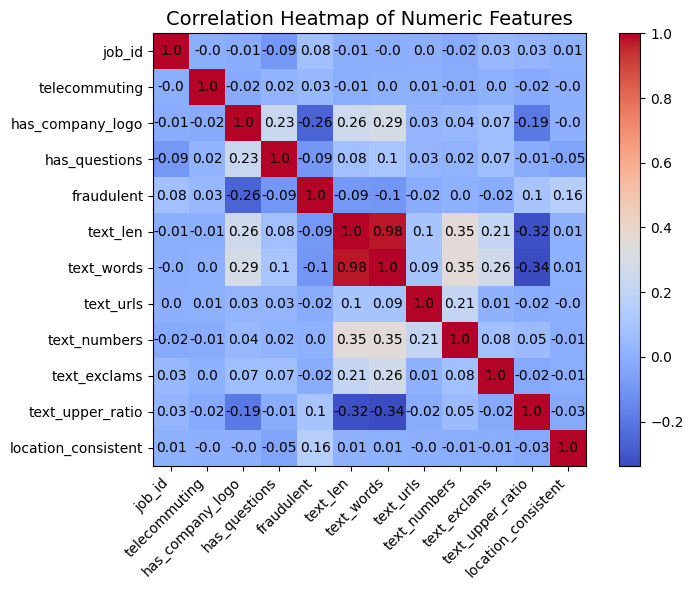

In [29]:
import matplotlib.pyplot as plt
import numpy as np
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(len(corr_matrix.columns))
plt.xticks(tick_marks, corr_matrix.columns, rotation=45, ha="right")
plt.yticks(tick_marks, corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, round(corr_matrix.iloc[i, j], 2),
                 ha='center', va='center', color='black')
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


--- Training and Evaluating Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3403
           1       0.56      0.92      0.70       173

    accuracy                           0.96      3576
   macro avg       0.78      0.94      0.84      3576
weighted avg       0.97      0.96      0.97      3576

Confusion Matrix:
[[3280  123]
 [  14  159]]


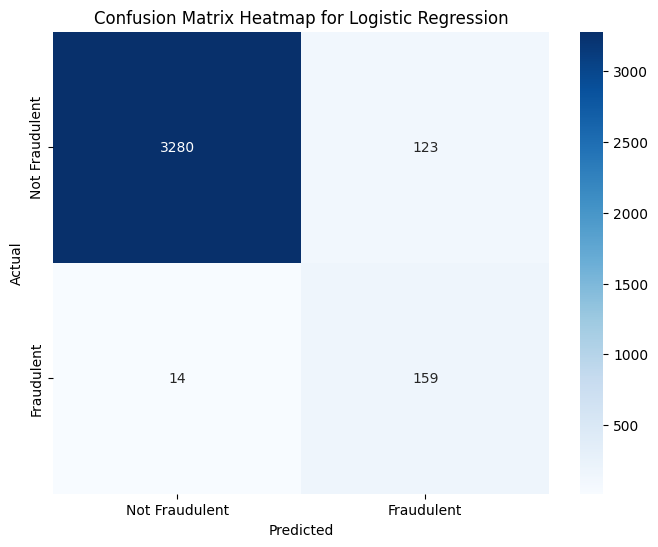

ROC AUC: 0.9897


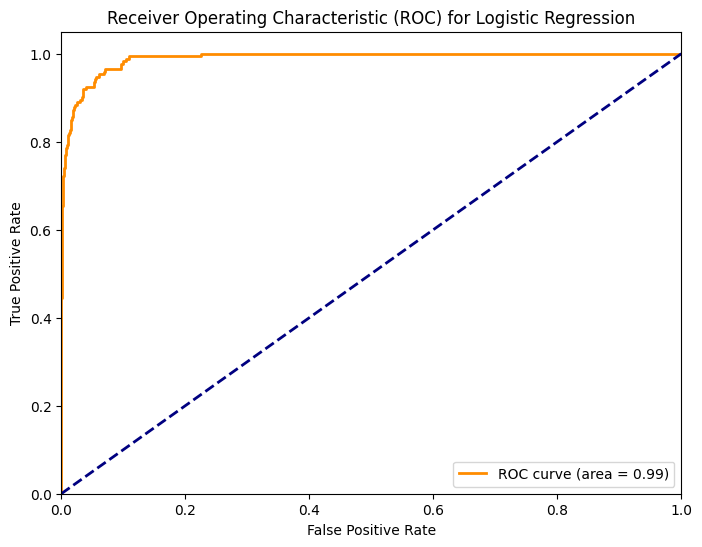

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("\n--- Training and Evaluating Logistic Regression ---")
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraudulent', 'Fraudulent'],
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Logistic Regression')
plt.show()
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"ROC AUC: {roc_auc_lr:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


--- Training and Evaluating Decision Tree ---

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.78      0.74      0.76       173

    accuracy                           0.98      3576
   macro avg       0.88      0.86      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3366   37]
 [  45  128]]


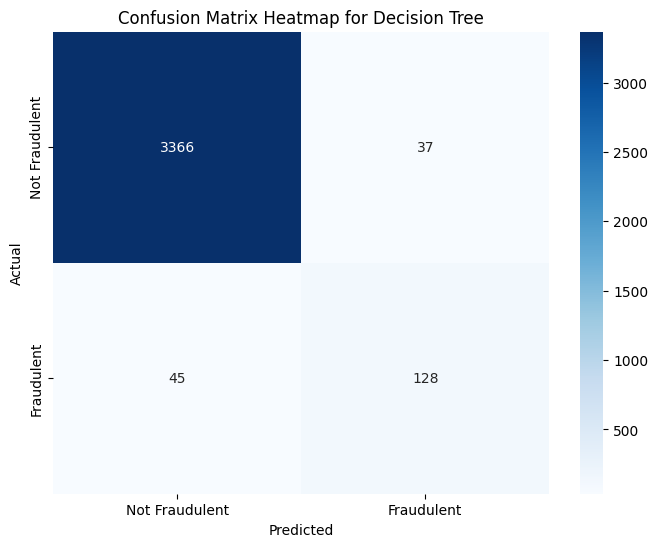

ROC AUC: 0.8645


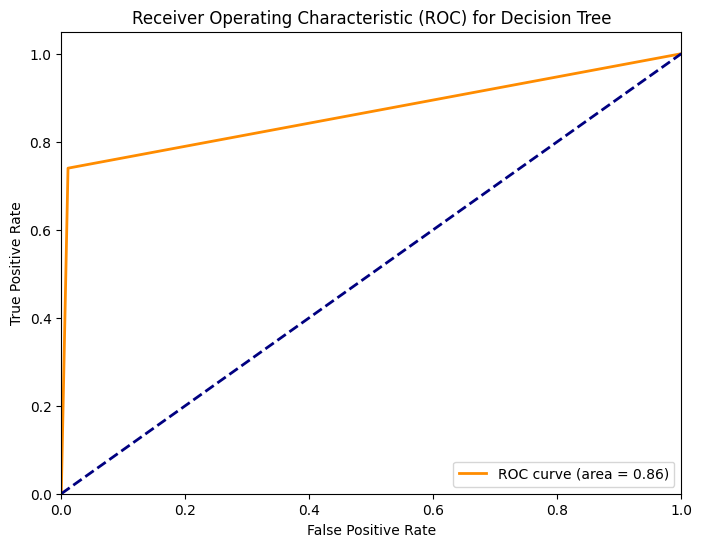

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("\n--- Training and Evaluating Decision Tree ---")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraudulent', 'Fraudulent'],
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Decision Tree')
plt.show()
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC AUC: {roc_auc_dt:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Decision Tree')
plt.legend(loc="lower right")
plt.show()


--- Training and Evaluating K-Nearest Neighbors ---

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.84      0.71      0.77       173

    accuracy                           0.98      3576
   macro avg       0.91      0.85      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3380   23]
 [  50  123]]


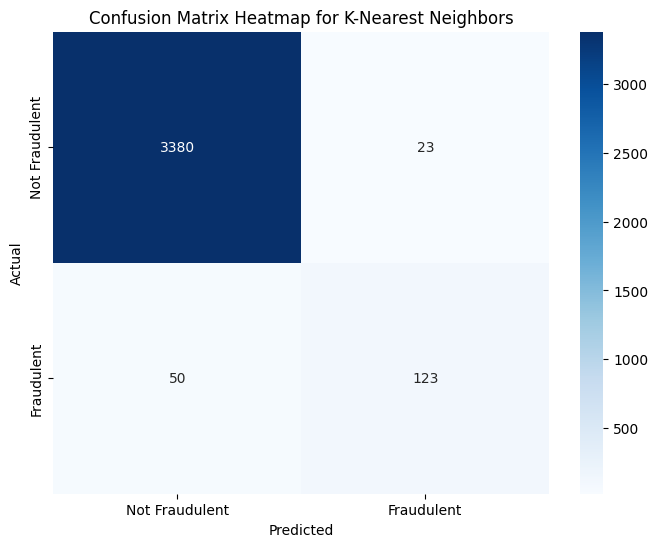

ROC AUC: 0.9559


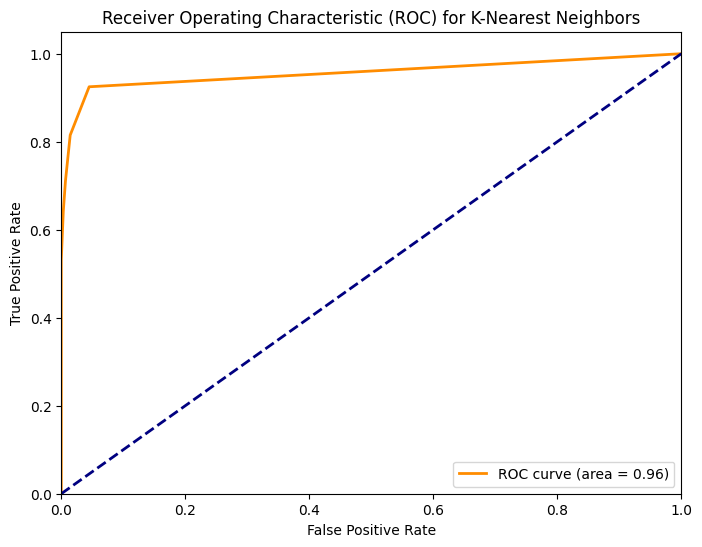

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("\n--- Training and Evaluating K-Nearest Neighbors ---")
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
y_proba_knn = model_knn.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraudulent', 'Fraudulent'],
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for K-Nearest Neighbors')
plt.show()
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"ROC AUC: {roc_auc_knn:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


--- Training and Evaluating Gaussian Naive Bayes ---

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.51      0.75      0.61       173

    accuracy                           0.95      3576
   macro avg       0.75      0.86      0.79      3576
weighted avg       0.96      0.95      0.96      3576

Confusion Matrix:
[[3279  124]
 [  43  130]]


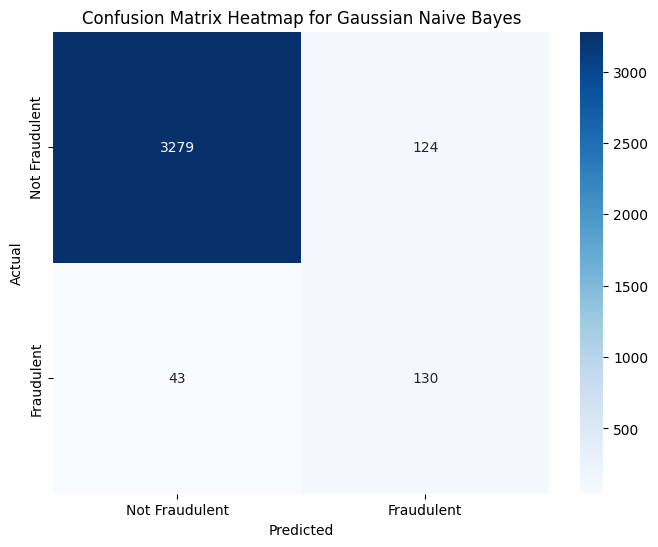

ROC AUC: 0.8574


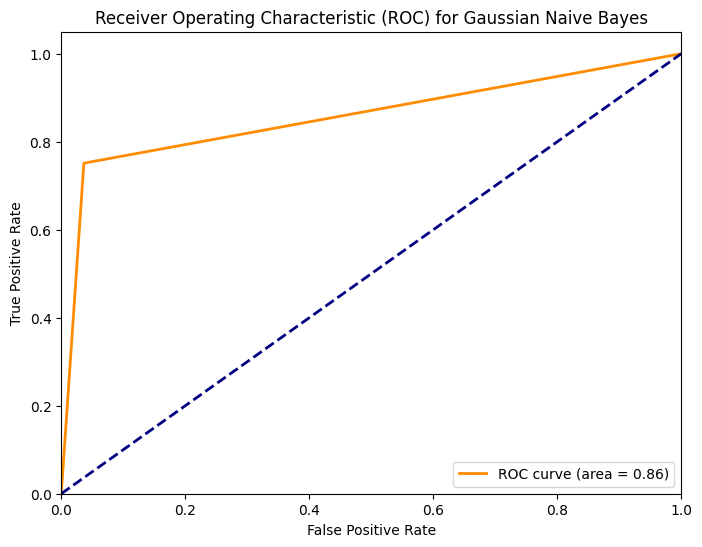

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("\n--- Training and Evaluating Gaussian Naive Bayes ---")
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
y_proba_gnb = model_gnb.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:")
print(cm_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraudulent', 'Fraudulent'],
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Gaussian Naive Bayes')
plt.show()
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_proba_gnb)
print(f"ROC AUC: {roc_auc_gnb:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [34]:
import numpy as np
results = {
    "Logistic Regression": roc_auc_lr,
    "K-Nearest Neighbors": roc_auc_knn,
    "Decision Tree": roc_auc_dt,
    "Gaussian Naive Bayes": roc_auc_gnb
}
best_model_name = max(results, key=results.get)
best_roc_auc = results[best_model_name]
print(f"\n=============================================")
print(f"The best performing model is: {best_model_name} with an ROC AUC of {best_roc_auc:.4f}")
print(f"=============================================")


The best performing model is: Logistic Regression with an ROC AUC of 0.9897


In [37]:
import pickle
filename = "trained_model.sav"
with open(filename, 'wb') as file:
    pickle.dump((model_lr, tfidf_vectorizer), file)
print(f"Model and vectorizer saved to {filename}")

Model and vectorizer saved to trained_model.sav
